**Mounting Google Drive**

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries & Acquiring Dataset**

In [2]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [9]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/AIMS LAB UIU/test-dataset.xlsx')
df.head()

,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN
3,4,241180,Lower class,KOLA,988807,দিপালীরাণী,0.0,0.0,1956-02-02 18:00:00,64,...,NaN,8.72,Random,Normal,85.0,Normal,NaN,NaN,NaN,NaN
4,5,241181,Lower class,KOLA,988809,বুলবুলি,0.0,0.0,1996-12-25 18:00:00,23,...,NaN,NaN,NaN,NaN,101.0,High,NaN,NaN,NaN,NaN


**Dataframe preview**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  29999 non-null  int64  
 1   household_id                29999 non-null  int64  
 2   total_income                29999 non-null  object 
 3   union_name                  29999 non-null  object 
 4   user_id                     29999 non-null  int64  
 5   profile_name                29999 non-null  object 
 6   father_name                 25561 non-null  object 
 7   mother_name                 25547 non-null  object 
 8   birthday                    29999 non-null  object 
 9   age                         29999 non-null  int64  
 10  gender                      29999 non-null  object 
 11  is_poor                     29999 non-null  int64  
 12  is_freedom_fighter          29999 non-null  int64  
 13  had_stroke                  299

In [11]:
df.describe()

,Unnamed: 0,household_id,user_id,age,is_poor,is_freedom_fighter,had_stroke,has_cardiovascular_disease,SYSTOLIC,DIASTOLIC,HEIGHT,WEIGHT,BMI,SUGAR,PULSE_RATE,SPO2,MUAC
count,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,27600.000000,27600.000000,1128.000000,1128.000000,1128.000000,1583.000000,27455.000000,4345.000000,74.000000
mean,15000.000000,220657.302510,9.784833e+05,38.637621,0.0,0.000200,0.000767,0.001133,122.163623,76.133949,147.798502,50.027589,22.736490,9.990543,83.635913,97.627657,13.585946
std,8660.109699,158927.210137,8.081330e+05,17.494271,0.0,0.014141,0.027679,0.033647,20.863131,12.277434,22.769384,15.096071,6.036540,5.242119,12.678662,4.026527,1.266408
min,1.000000,12300.000000,9.680400e+04,0.000000,0.0,0.000000,0.000000,0.000000,52.000000,30.000000,35.560000,5.000000,1.581636,0.110000,1.000000,5.000000,11.000000
25%,7500.500000,81244.500000,3.516110e+05,26.000000,0.0,0.000000,0.000000,0.000000,107.000000,68.000000,137.160000,44.000000,18.920936,6.410000,75.000000,98.000000,13.000000
50%,15000.000000,219654.000000,9.050990e+05,37.000000,0.0,0.000000,0.000000,0.000000,120.000000,75.000000,152.400000,50.000000,21.958377,8.120000,83.000000,99.000000,13.500000
75%,22499.500000,279809.500000,1.122635e+06,50.000000,0.0,0.000000,0.000000,0.000000,132.000000,83.000000,162.560000,59.000000,25.795170,11.960000,92.000000,99.000000,14.500000
max,29999.000000,786118.000000,4.040559e+06,120.000000,0.0,1.000000,1.000000,1.000000,227.000000,144.000000,243.840000,97.000000,67.932934,35.000000,206.000000,100.000000,17.600000


In [12]:
df.dtypes

Unnamed: 0                      int64
household_id                    int64
total_income                   object
union_name                     object
user_id                         int64
profile_name                   object
father_name                    object
mother_name                    object
birthday                       object
age                             int64
gender                         object
is_poor                         int64
is_freedom_fighter              int64
had_stroke                      int64
has_cardiovascular_disease      int64
disabilities_name              object
diabetic                         bool
profile_hypertensive             bool
SYSTOLIC                      float64
DIASTOLIC                     float64
RESULT_STAT_BP                 object
HEIGHT                        float64
WEIGHT                        float64
BMI                           float64
RESULT_STAT_BMI                object
SUGAR                         float64
TAG_NAME    

In [13]:
df.nunique()

Unnamed: 0                    29999
household_id                  21449
total_income                      4
union_name                       16
user_id                       29999
profile_name                  17168
father_name                    4710
mother_name                    3701
birthday                      22828
age                             105
gender                            2
is_poor                           1
is_freedom_fighter                2
had_stroke                        2
has_cardiovascular_disease        2
disabilities_name                 6
diabetic                          2
profile_hypertensive              2
SYSTOLIC                        157
DIASTOLIC                        92
RESULT_STAT_BP                    7
HEIGHT                           59
WEIGHT                          117
BMI                             540
RESULT_STAT_BMI                   6
SUGAR                           890
TAG_NAME                          3
RESULT_STAT_SUGAR           

**Feature Analysis**

In [ ]:
# Set style for seaborn
sns.set_style("whitegrid")

In [14]:
# Cardiovascular Disease Prevalence
cvd_percentage = (df['has_cardiovascular_disease'].sum() / len(df)) * 100
print(f"Percentage of users with cardiovascular diseases: {cvd_percentage:.2f}%")

Percentage of users with cardiovascular diseases: 0.11%


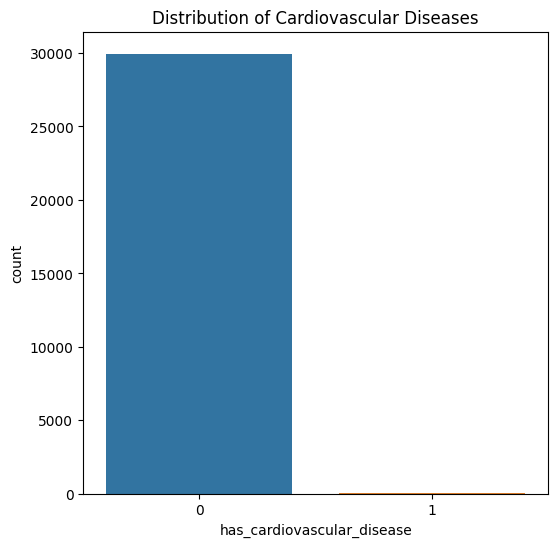

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='has_cardiovascular_disease', data=df)
plt.title('Distribution of Cardiovascular Diseases')
plt.show()

In [15]:
# Diabetes Analysis
diabetic_percentage = (df['diabetic'].sum() / len(df)) * 100
print(f"Percentage of diabetic users: {diabetic_percentage:.2f}%")

Percentage of diabetic users: 2.00%


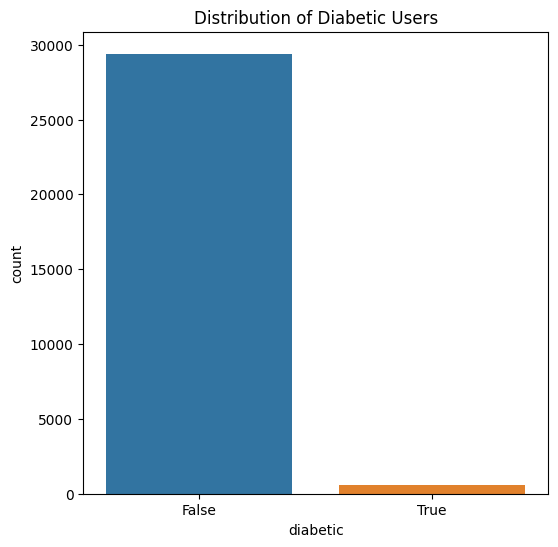

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='diabetic', data=df)
plt.title('Distribution of Diabetic Users')
plt.show()

In [16]:
# Blood Pressure Analysis
avg_systolic = df['SYSTOLIC'].mean()
avg_diastolic = df['DIASTOLIC'].mean()
print(f"Average SYSTOLIC blood pressure: {avg_systolic:.2f}")
print(f"Average DIASTOLIC blood pressure: {avg_diastolic:.2f}")

Average SYSTOLIC blood pressure: 122.16
Average DIASTOLIC blood pressure: 76.13


<ipython-input-22-c0054b3cd7f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SYSTOLIC'], bins=30, kde=False, color='blue', label='SYSTOLIC')
<ipython-input-22-c0054b3cd7f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DIASTOLIC'], bins=30, kde=False, color='red', label='DIASTOLIC

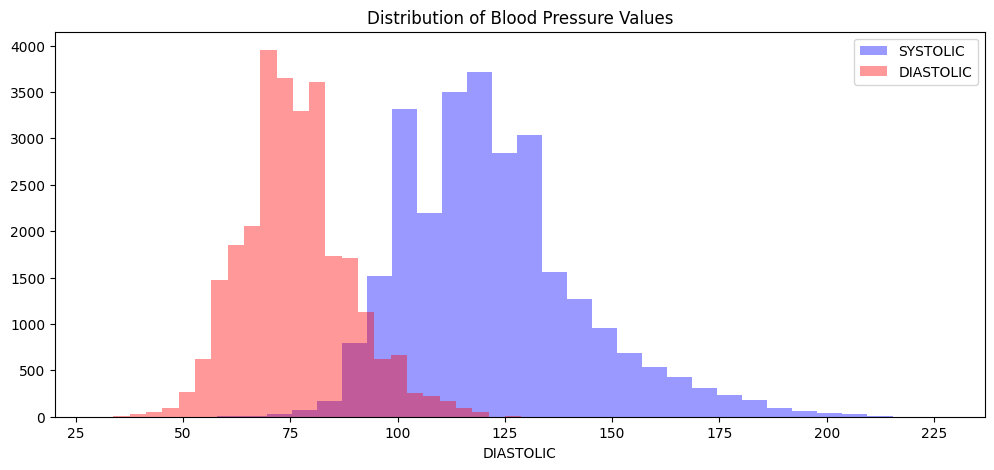

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df['SYSTOLIC'], bins=30, kde=False, color='blue', label='SYSTOLIC')
sns.distplot(df['DIASTOLIC'], bins=30, kde=False, color='red', label='DIASTOLIC')
plt.legend()
plt.title('Distribution of Blood Pressure Values')
plt.show()

In [17]:
# Assuming high blood pressure is defined by SYSTOLIC > 140 or DIASTOLIC > 90
hypertensive_users = df[(df['SYSTOLIC'] > 140) | (df['DIASTOLIC'] > 90)]
hypertensive_percentage = (len(hypertensive_users) / len(df)) * 100
print(f"Percentage of hypertensive users: {hypertensive_percentage:.2f}%")

Percentage of hypertensive users: 18.62%


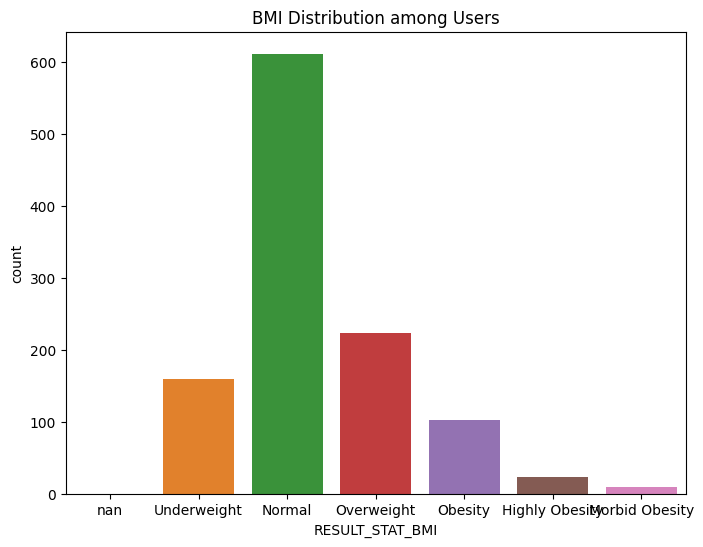

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='RESULT_STAT_BMI', data=df, order=df['RESULT_STAT_BMI'].unique())
plt.title('BMI Distribution among Users')
plt.show()

In [19]:
bmi_distribution = df['RESULT_STAT_BMI'].value_counts(normalize=True) * 100
print("\nBMI Distribution:")
print(bmi_distribution)


BMI Distribution:
Normal            54.255319
Overweight        19.769504
Underweight       14.095745
Obesity            9.042553
Highly Obesity     2.039007
Morbid Obesity     0.797872
Name: RESULT_STAT_BMI, dtype: float64


**Correlation Matrix**

<ipython-input-30-1f6c5df177b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


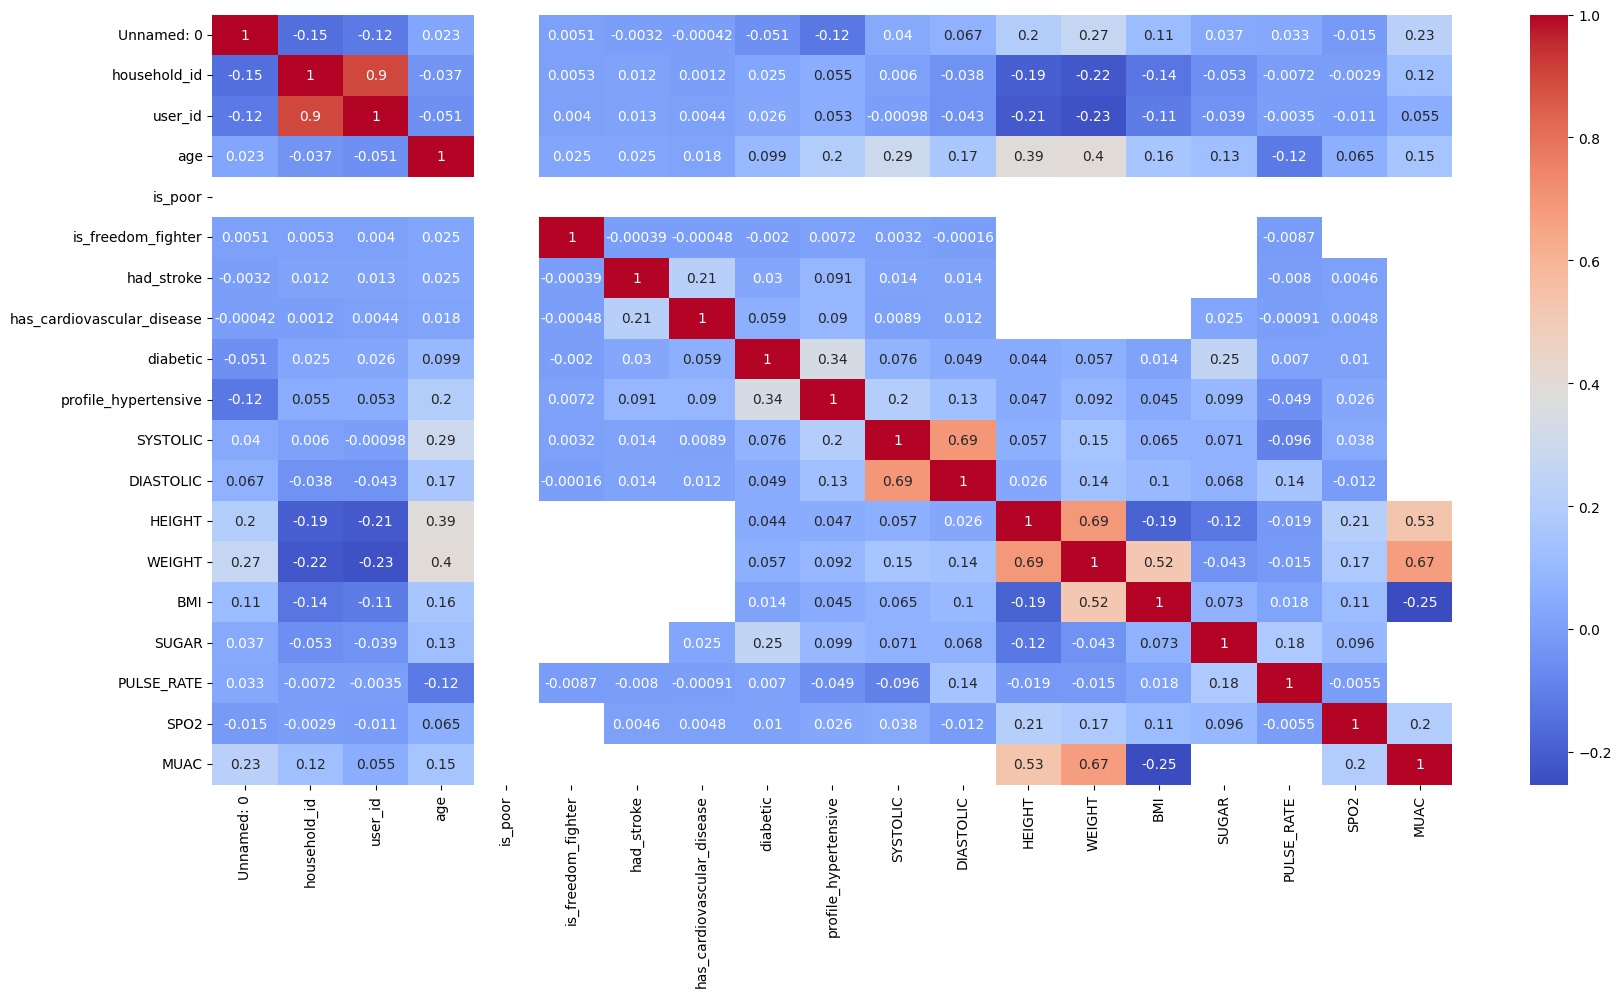

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

**Dropping unecessary columns**

In [8]:
try:
    df = df.drop(['profile_name', 'birthday', 'is_poor', 'is_freedom_fighter'], axis=1)
    df.head()
except KeyError:
    print(f"Column not found in the DataFrame!")

**Handling numerical and binary values**

In [45]:
for col in df.columns:
    if len(df[col].unique()) == 2 and col != 'gender':
        df[col] = df[col].astype(bool)

**Balancing Dastaset based on dependent feature**

In [46]:
count_0s = df['has_cardiovascular_disease'].value_counts()[0]
count_1s = df['has_cardiovascular_disease'].value_counts()[1]
print(count_0s, count_1s)

29965 34


In [47]:
min_count = min(count_0s, count_1s)

# Balance the DataFrame
df = pd.concat([
    df[df['has_cardiovascular_disease'] == 0].sample(n=min_count),
    df[df['has_cardiovascular_disease'] == 1].sample(n=min_count)
])

**Keeping the Categforical Columns for Feature Selection**

In [48]:
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool'])
df = categorical_columns

**Dropping columns that has null values**

In [49]:
df = df.dropna(axis=1, how='any')

**Feature Encoding Categorical Columns**

In [50]:
for column in df.columns:
    if df[column].dtype in ['object', 'category', 'bool']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

<ipython-input-50-1627a05bdab6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-50-1627a05bdab6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-50-1627a05bdab6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

**Applying Chi Squared test** \
Comparing *'has_cardiovascular_disease'* column with other variables

In [51]:
target_column = 'has_cardiovascular_disease'
X = df.drop(target_column, axis=1)
y = df[target_column]

f_score=chi2(X,y)
f_score

(array([ 1.18518519,  0.45308311,  0.25      ,  6.        ,         nan,
         9.        , 19.17391304]),
 array([2.76302917e-01, 5.00874459e-01, 6.17075077e-01, 1.43058784e-02,
                   nan, 2.69979606e-03, 1.19333108e-05]))

In [52]:
p_value=pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)

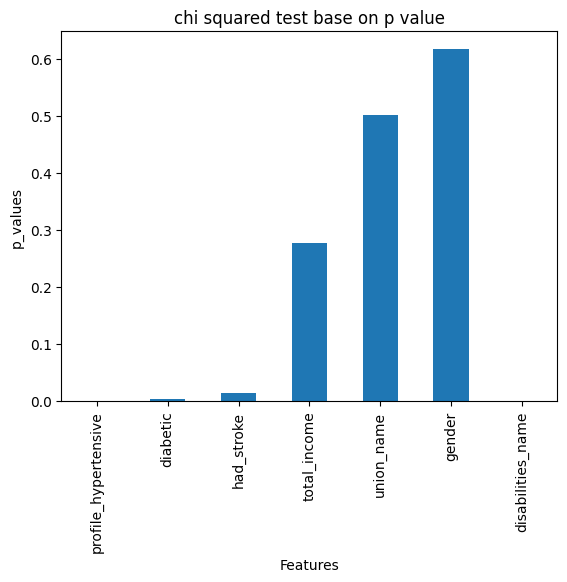

In [53]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=10)
plt.ylabel("p_values",fontsize=10)
plt.title("chi squared test base on p value")
plt.show()